<a href="https://colab.research.google.com/github/handochan/Data/blob/master/%EB%8D%94%EB%B3%B8%EC%BD%94%EB%A6%AC%EC%95%84%EA%B8%B0%EC%97%85%EA%B0%80%EC%B9%98%ED%8F%89%EA%B0%80ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,640 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

# 1. 기업 재무 데이터 분석
  * 분석하는 목표 : 이 회사 얼마짜리? (기업 가치 평가)
  * 가격의 구성 : 내재가치(청산가치) + 프리미엄(or디스카운트)


# 2. 데이터 수집 및 정리
  * 기업 재무에 중심이 되는 2개의 식에 들어있는 6개의 항목 중심으로 데이터 수집
      * 이익 = 매출 - 지출
      * 자산 = 부채 + 자본


  * 현금화가 어려운 자산
    * 재고자산 : 상품, 제품, 원재료, 저장품
    * 무형자산 : 산업재산권(특허권, 상표권), 소프트웨어, 건설중인 자산
      * 이 중에서 건설중인 자산은 현금화가 가능할 것 같아서 따로 추출

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#한글폰트실행
plt.rc('font', family='NanumBarunGothic')

In [ ]:
theborn = pd.read_csv('/content/drive/MyDrive/더본코리아재무분석/더본코리아.csv')

In [ ]:
theborn

,Unnamed: 0,자산총계,부채총계,자본총계,매출액,매출원가,판매비와관리비,당기순이익,재고자산,무형자산,건설중인자산(무형자산)
0,2012,24813586135,15704367083,9109219052,68323290324,50434441202,13680909003,3530361094,0,97716378,0
1,2013,34008773844,18785999730,15222774114,77502400639,54535796909,17914109527,2904881016,709037614,1844460816,0
2,2014,49362426187,29657005069,19705421118,92742228918,65633348901,20790967556,4443562855,972638631,1777598881,0
3,2015,70871878747,45836085167,25035793580,123861782375,84793971170,28093328209,6960110664,1469379798,198720151,0
4,2016,71249205263,27371864424,43877340839,174871404102,124471892823,30637025853,19246938573,1617853963,295930984,28653795
5,2017,84998333055,35339190464,49659142591,174084567921,126159869983,35117062462,5982224171,1626572923,300982429,23754003
6,2018,89729934244,33465620858,56264313386,102466002311,53061135337,39206791901,6586517717,2164476080,414897549,98519091
7,2019,109014451640,44715637395,64298814245,120090805080,60613461941,48209097826,7953088605,2484794231,1051561939,657062354


In [ ]:
theborn.rename(columns = {'Unnamed: 0' : '년도'}, inplace = True)

In [ ]:
theborn

,년도,자산총계,부채총계,자본총계,매출액,매출원가,판매비와관리비,당기순이익,재고자산,무형자산,건설중인자산(무형자산)
0,2012,24813586135,15704367083,9109219052,68323290324,50434441202,13680909003,3530361094,0,97716378,0
1,2013,34008773844,18785999730,15222774114,77502400639,54535796909,17914109527,2904881016,709037614,1844460816,0
2,2014,49362426187,29657005069,19705421118,92742228918,65633348901,20790967556,4443562855,972638631,1777598881,0
3,2015,70871878747,45836085167,25035793580,123861782375,84793971170,28093328209,6960110664,1469379798,198720151,0
4,2016,71249205263,27371864424,43877340839,174871404102,124471892823,30637025853,19246938573,1617853963,295930984,28653795
5,2017,84998333055,35339190464,49659142591,174084567921,126159869983,35117062462,5982224171,1626572923,300982429,23754003
6,2018,89729934244,33465620858,56264313386,102466002311,53061135337,39206791901,6586517717,2164476080,414897549,98519091
7,2019,109014451640,44715637395,64298814245,120090805080,60613461941,48209097826,7953088605,2484794231,1051561939,657062354


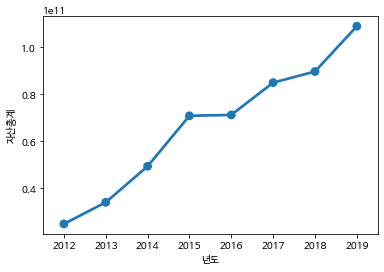

In [ ]:
sns.pointplot(data=theborn, x='년도', y='자산총계')

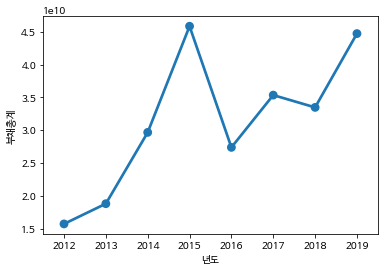

In [ ]:
sns.pointplot(data=theborn, x='년도', y='부채총계')

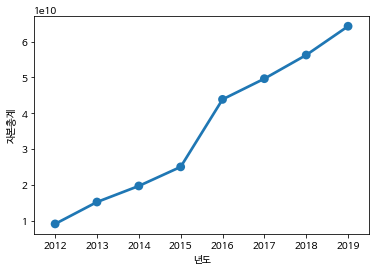

In [ ]:
sns.pointplot(data=theborn, x='년도', y='자본총계')

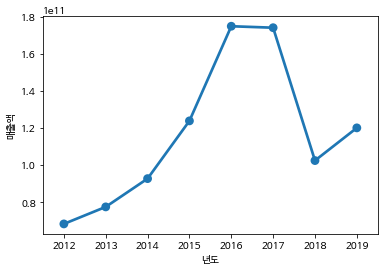

In [ ]:
sns.pointplot(data=theborn, x='년도', y='매출액')

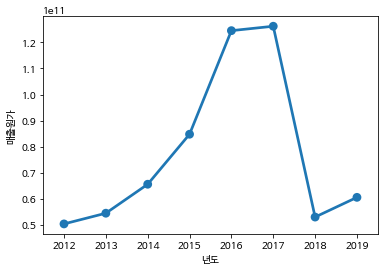

In [ ]:
sns.pointplot(data=theborn, x='년도', y='매출원가')

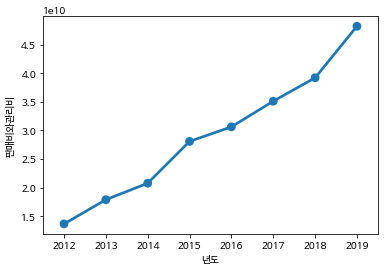

In [ ]:
sns.pointplot(data=theborn, x='년도', y='판매비와관리비')

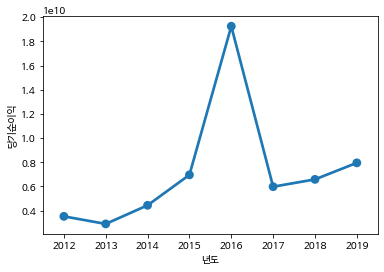

In [ ]:
sns.pointplot(data=theborn, x='년도', y='당기순이익')

# 3. 내재가치 평가
  * 파는 사람의 입장에서 생각하면 접근 용이
  * '청산가치'를 계산
    * 청산가치 : 회사가 당장 내일 문을 닫는다고 가정하고, 오늘 모든 것을 다 처분했을 때 남는 현금의 양


##  청산가치 계산하기
  * 청산가치 = 전체 자산 - 남에게 빌린돈 (타인, 부채) - 현금화 하기 어려운 자산
  * 청산가치 = 자본(자기자본) - 현금화 하기 어려운 자산
  * 더본코리아 현금화 하기 어려운 자산 : 재고자산(30%로 설정), 무형자산

In [ ]:
# 파이썬 데이터 사칙연산 : add, sub, mul, div

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
theborn['내재가치'] = theborn['자본총계'].sub(theborn['무형자산']).sub(theborn['재고자산'].mul(0.7)).add(theborn['건설중인자산(무형자산)'])
theborn['내재가치']

0    9011502674.00
1   12881986968.20
2   17246975195.30
3   23808507570.40
4   42477565875.90
5   48243313118.90
6   54432801672.00
7   62164958698.30
Name: 내재가치, dtype: float64

In [ ]:
# 숫자 표기법 변환
# pd.options.display.float_format = '{:.2f}'.format

# 그래프 축 숫자 표기법 변환
# plt.ticklabel_format(style = "plain")     

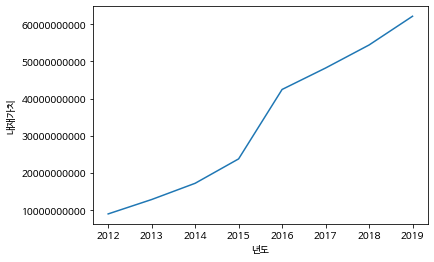

In [ ]:
# 내재가치 lineplot
plt.ticklabel_format(style = "plain")
sns.lineplot(data = theborn, x='년도', y='내재가치')

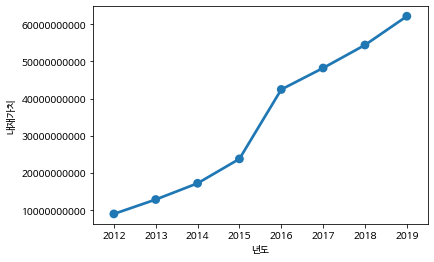

In [ ]:
plt.ticklabel_format(style = "plain")
sns.pointplot(data=theborn, x='년도', y='내재가치')

In [ ]:
theborn[['년도', '내재가치']]

,년도,내재가치
0,2012,9011502674.00
1,2013,12881986968.20
2,2014,17246975195.30
3,2015,23808507570.40
4,2016,42477565875.90
5,2017,48243313118.90
6,2018,54432801672.00
7,2019,62164958698.30


## 분석결과
  * 내재가치가 + 이고 상승 중인 것으로 보아서 모든 것을 잃게 되진 않을 것으로 보임
  * 2015년도에 한번 급격하게 성장 이유
    * '집밥 백선생' 프로그램(2014부터 방영) + 편의점(CU) 제휴 백종원 간편식 시리즈 상품 출시
  * 2017년엔 '호텔더본'개관으로 호텔사업시작
  * 위험성은 2020년에 코로나19 바이러스로 인해 외식업과 호텔사업 등 타격이 클 수 밖에 없는 산업이다 보니 아직 재무제표가 공개되지는 않았지만 코로나19 상황에 따라 크게 변동이 있을 것으로 보임


### (참고) 재무분석 = 재무 비율 분석
 * 안정성 : 부채비율, 자기자본비율, 유동비율
 * 성장성 : 매출액증가율, 총자산증가율
 * 수익성 : 당기순이익율(매출액순이익률), 자기자본순이익률(ROE. Return of Earning)

# 4. 프리미엄(or 디스카운트) 평가
  * 미래에 발생할 이익을 감안하여 프리미엄
  * 미래에 발생할 손실을 감안하여 적절한 디스카운트
  * (주의) 성장성, 수익성은 약하지만 대대적인 투자를 실시해서 해당 년도의 지출이 일시적으로 많이 발생한 경우도 있음.
  * 재무분석(+재무비율분석)
    * 비즈니스모델 이해
    * 안정성 분석
    * 수익성 분석
    * 성장성 분석


  * 프리미엄 평가 프로세스
    * 재무분석
    * 지속가능성 분석 : 매출원가, 고정비 점검
    * 리스크(위험요인) 진단

## (1) 비즈니스모델 이해
  * 주요 사업 내용 :

## (2) 안정성 평가
  * 부채비율 = 부채(타인자본) / 자본(자기자본)
    * 100% 이하이면 우수한 것으로 평가
  * 자기자본비율 = 자본(자기자본) / 자산
    * 50% 이상이면 우수

In [ ]:
# 부채비율

theborn['부채비율'] = theborn['부채총계'].div(theborn['자본총계'])
theborn['부채비율']

0   1.72
1   1.23
2   1.51
3   1.83
4   0.62
5   0.71
6   0.59
7   0.70
Name: 부채비율, dtype: float64

In [ ]:
theborn[['년도','부채비율']]

,년도,부채비율
0,2012,1.72
1,2013,1.23
2,2014,1.51
3,2015,1.83
4,2016,0.62
5,2017,0.71
6,2018,0.59
7,2019,0.70


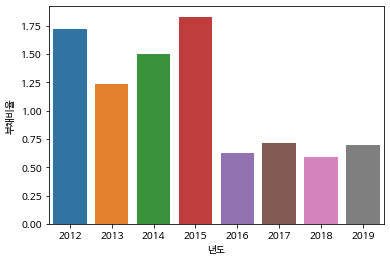

In [ ]:
sns.barplot(data = theborn, x='년도', y='부채비율')

In [ ]:
# 자기자본비율

theborn['자기자본비율'] = theborn['자본총계'].div(theborn['자산총계'])
theborn['자기자본비율']

0   0.37
1   0.45
2   0.40
3   0.35
4   0.62
5   0.58
6   0.63
7   0.59
Name: 자기자본비율, dtype: float64

In [ ]:
theborn[['년도','자기자본비율']]

,년도,자기자본비율
0,2012,0.37
1,2013,0.45
2,2014,0.40
3,2015,0.35
4,2016,0.62
5,2017,0.58
6,2018,0.63
7,2019,0.59


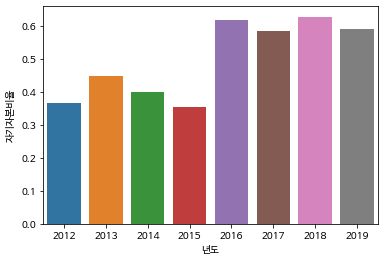

In [ ]:
sns.barplot(data = theborn, x='년도', y='자기자본비율')

### 분석결과
  * 대체적으로 안정적인 편인것으로 보인다.

## (3) 성장성 평가
 * 매출액증가율 = (이번년도 매출액 - 전년도 매출액) / 전년도 매출액
  * 높을수록 
  
* 총자산증가율 = (이번년도 총자산 - 전년도 총자산_ / 전년도 총자산
 * 높을수록

In [ ]:
# 매출액증가율

theborn['매출액증가율'] = theborn['매출액'].pct_change()
theborn['매출액증가율']

0     nan
1    0.13
2    0.20
3    0.34
4    0.41
5   -0.00
6   -0.41
7    0.17
Name: 매출액증가율, dtype: float64

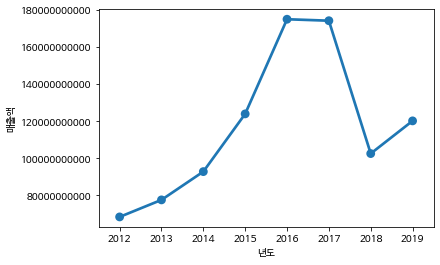

In [ ]:
plt.ticklabel_format(style = "plain")
sns.pointplot(data = theborn, x='년도', y='매출액')

In [ ]:
theborn[['년도', '매출액']]

,년도,매출액
0,2012,68323290324
1,2013,77502400639
2,2014,92742228918
3,2015,123861782375
4,2016,174871404102
5,2017,174084567921
6,2018,102466002311
7,2019,120090805080


In [ ]:
theborn[['년도', '매출액증가율']]

,년도,매출액증가율
0,2012,nan
1,2013,0.13
2,2014,0.20
3,2015,0.34
4,2016,0.41
5,2017,-0.00
6,2018,-0.41
7,2019,0.17


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


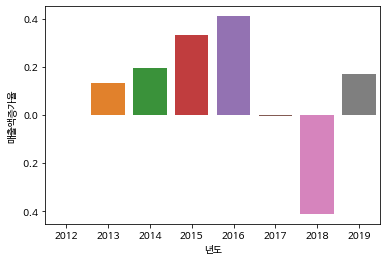

In [ ]:
sns.barplot(data = theborn, x='년도', y='매출액증가율')

In [ ]:
# 총자산증가율
theborn['총자산증가율'] = theborn['자산총계'].pct_change()
theborn['총자산증가율']

0    nan
1   0.37
2   0.45
3   0.44
4   0.01
5   0.19
6   0.06
7   0.21
Name: 총자산증가율, dtype: float64

In [ ]:
theborn[['년도', '총자산증가율']]

,년도,총자산증가율
0,2012,nan
1,2013,0.37
2,2014,0.45
3,2015,0.44
4,2016,0.01
5,2017,0.19
6,2018,0.06
7,2019,0.21


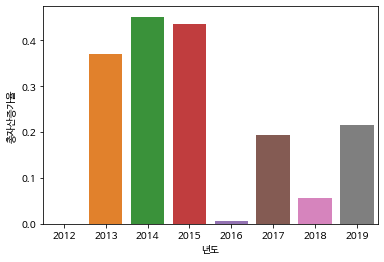

In [ ]:
sns.barplot(data = theborn, x='년도', y='총자산증가율')

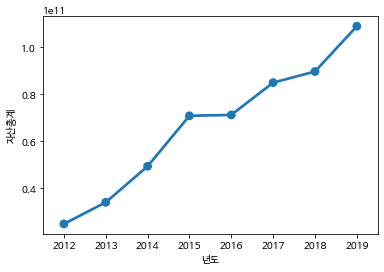

In [ ]:
sns.pointplot(data=theborn, x='년도', y='자산총계')

### 분석결과
  * 꾸준히 증가하다가 2018년에 매출액이 급격히 줄었다. 하지만 자산 총계는 오히려 늘어난것을 알 수 있다.

## (4) 수익성 평가
  * 당기순이익율(매출액순이익율) = 당기순이익 / 매출액
    * 높을수록 좋긴한데 너무 높으면 이상
  
  * 자기자본수익율(ROE) = 올해 당기순이익 / 올해와 전년도의 자기자본 평균
    * 자기자본(평균) = (올해 자본총계 + 전년도 자본총계)/2
    * 높을수록 좋음, 일정 퍼센트를 꾸준히 유지하는 것도 매우 중요

In [ ]:
# 당기순이익율

theborn['당기순이익율'] = theborn['당기순이익'].div(theborn['매출액'])
theborn['당기순이익율']

0   0.05
1   0.04
2   0.05
3   0.06
4   0.11
5   0.03
6   0.06
7   0.07
Name: 당기순이익율, dtype: float64

In [ ]:
theborn[['년도', '당기순이익율']]

,년도,당기순이익율
0,2012,0.05
1,2013,0.04
2,2014,0.05
3,2015,0.06
4,2016,0.11
5,2017,0.03
6,2018,0.06
7,2019,0.07


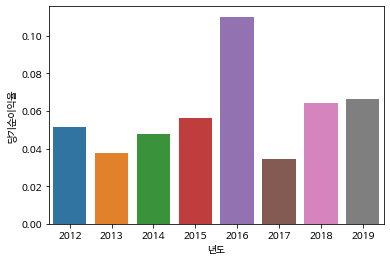

In [ ]:
sns.barplot(data=theborn, x='년도', y='당기순이익율')

In [ ]:
theborn['자본총계_shift'] = theborn['자본총계'].shift(1)
theborn['자기자본(평균)'] = theborn[['자본총계', '자본총계_shift']].mean(1)

In [ ]:
theborn['자기자본(평균)']

0    9109219052.00
1   12165996583.00
2   17464097616.00
3   22370607349.00
4   34456567209.50
5   46768241715.00
6   52961727988.50
7   60281563815.50
Name: 자기자본(평균), dtype: float64

In [ ]:
# 자기자본수익율

theborn['자기자본수익율'] = theborn['당기순이익'].div(theborn['자기자본(평균)'])
theborn['자기자본수익율']

0   0.39
1   0.24
2   0.25
3   0.31
4   0.56
5   0.13
6   0.12
7   0.13
Name: 자기자본수익율, dtype: float64

In [ ]:
theborn[['년도', '자기자본수익율']]

,년도,자기자본수익율
0,2012,0.39
1,2013,0.24
2,2014,0.25
3,2015,0.31
4,2016,0.56
5,2017,0.13
6,2018,0.12
7,2019,0.13


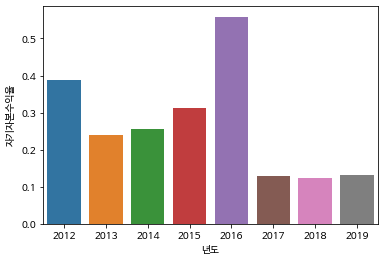

In [ ]:
sns.barplot(data=theborn, x='년도', y='자기자본수익율')

### 분석결과
  * 당기순이익율은 크게 높지는 않으나 계속 유지중
  * 자기자본수익율은 매우 높은 편, 2017년부터는 꾸준히 10%대 유지
    * 2016년에는 50프로가 넘어갔는데 무슨일.,..?

## (5) 지속가능성 분석
  * 매출원가율 = 매출원가 / 매출액
    * 일정비율 유지하고 있는가?
    * 매출원가율 너무 낮으면 상품의 질 부족, 너무 높으면 이익이 낮아질 수 있다

  * 고정지출비율 = 판매비와관리비 / 매출액
    * (취업할 때 가장 중요한부분...?)
    * 일정한 비율을 유지하는가?
    * 너무 낮으면 근로의욕이 감소, 너무 높으면 이익이 낮아짐

In [ ]:
# 매출원가율

theborn['매출원가율'] = theborn['매출원가'].div(theborn['매출액'])
theborn['매출원가율']

0   0.74
1   0.70
2   0.71
3   0.68
4   0.71
5   0.72
6   0.52
7   0.50
Name: 매출원가율, dtype: float64

In [ ]:
theborn[['년도', '매출원가율']]

,년도,매출원가율
0,2012,0.74
1,2013,0.70
2,2014,0.71
3,2015,0.68
4,2016,0.71
5,2017,0.72
6,2018,0.52
7,2019,0.50


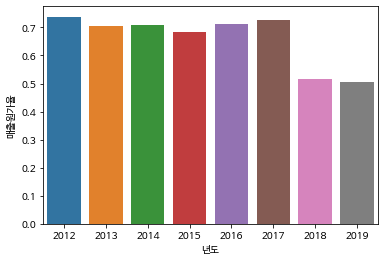

In [ ]:
sns.barplot(data = theborn, x='년도', y='매출원가율')

In [ ]:
# 고정지출비율

theborn['고정지출비율'] = theborn['판매비와관리비'].div(theborn['매출액'])
theborn['고정지출비율']

0   0.20
1   0.23
2   0.22
3   0.23
4   0.18
5   0.20
6   0.38
7   0.40
Name: 고정지출비율, dtype: float64

In [ ]:
theborn[['년도', '고정지출비율']]

,년도,고정지출비율
0,2012,0.20
1,2013,0.23
2,2014,0.22
3,2015,0.23
4,2016,0.18
5,2017,0.20
6,2018,0.38
7,2019,0.40


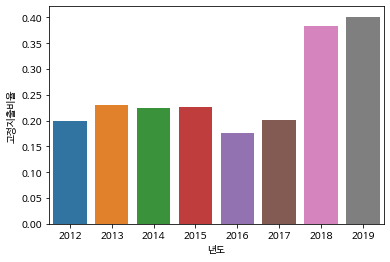

In [ ]:
sns.barplot(data=theborn, x='년도', y='고정지출비율')

### 분석결과

## (6) 리스크 진단
  * 재무적 리스크
  * 비재무적 리스크

# 5. 기업가치평가
  * 내재가치 + 프리미엄
    * '프리미엄'을 얼마 혹은 내재가치의 몇 퍼센트 또는 몇 배로 책정할 것인가?
  

  * 안정성 :
  * 성장성 : 
  * 수익성 : 
  * 지속가능성
  * 디스카운트 요인
  * 리스크 요인 중 가장 큰 것은...

 * 분석한 기업의 미래를 긍정적 부정적 전망 여부
 * 취업 추천 여부
 * 투자 추천, 혹은 관망, 비추